In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# Define the Pauli matrices
sigma_x = qt.sigmax()
sigma_y = qt.sigmay()
sigma_z = qt.sigmaz()

In [9]:
def analyze_hamiltonian(a, b):
    """Calculate and return eigenvalues and eigenvectors for given a, b"""
    H = 0.5 * a * sigma_z + 0.5 * b * sigma_x
    eigenvalues, eigenvectors = H.eigenstates()
    return eigenvalues, eigenvectors


In [ ]:
def plot_eigenvalues_vs_parameters():
    """Plot eigenvalues as functions of a and b"""
    fig = plt.figure(figsize=(15, 5))
    
    # Plot 1: Eigenvalues vs a (fixed b)
    ax1 = fig.add_subplot(131)
    a_values = np.linspace(-3, 3, 100)
    b_fixed = 1.0
    
    eigenvals_plus = []
    eigenvals_minus = []
    
    for a in a_values:
        evals, evecs = analyze_hamiltonian(a, b_fixed)
        eigenvals_plus.append(evals[0])
        eigenvals_minus.append(evals[1])
    
    ax1.plot(a_values, eigenvals_plus, 'b-', label='E₀', linewidth=2)
    ax1.plot(a_values, eigenvals_minus, 'r-', label='E₁', linewidth=2)
    ax1.set_xlabel('Parameter a')
    ax1.set_ylabel('Eigenvalues')
    ax1.set_title(f'Eigenvalues vs a (b={b_fixed})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Eigenvalues vs b (fixed a)
    ax2 = fig.add_subplot(132)
    b_values = np.linspace(-3, 3, 100)
    a_fixed = 1.0
    
    eigenvals_plus = []
    eigenvals_minus = []
    
    for b in b_values:
        evals, evecs = analyze_hamiltonian(a_fixed, b)
        eigenvals_plus.append(evals[0])
        eigenvals_minus.append(evals[1])
    
    ax2.plot(b_values, eigenvals_plus, 'b-', label='E₀', linewidth=2)
    ax2.plot(b_values, eigenvals_minus, 'r-', label='E₁', linewidth=2)
    ax2.set_xlabel('Parameter b')
    ax2.set_ylabel('Eigenvalues')
    ax2.set_title(f'Eigenvalues vs b (a={a_fixed})')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Energy gap
    ax3 = fig.add_subplot(133)
    a_values = np.linspace(-3, 3, 100)
    energy_gaps = []
    
    for a in a_values:
        evals, evecs = analyze_hamiltonian(a, b_fixed)
        energy_gaps.append(evals[1] - evals[0])
    
    ax3.plot(a_values, energy_gaps, 'g-', linewidth=2)
    ax3.set_xlabel('Parameter a')
    ax3.set_ylabel('Energy Gap E₁ - E₀')
    ax3.set_title(f'Energy Gap vs a (b={b_fixed})')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

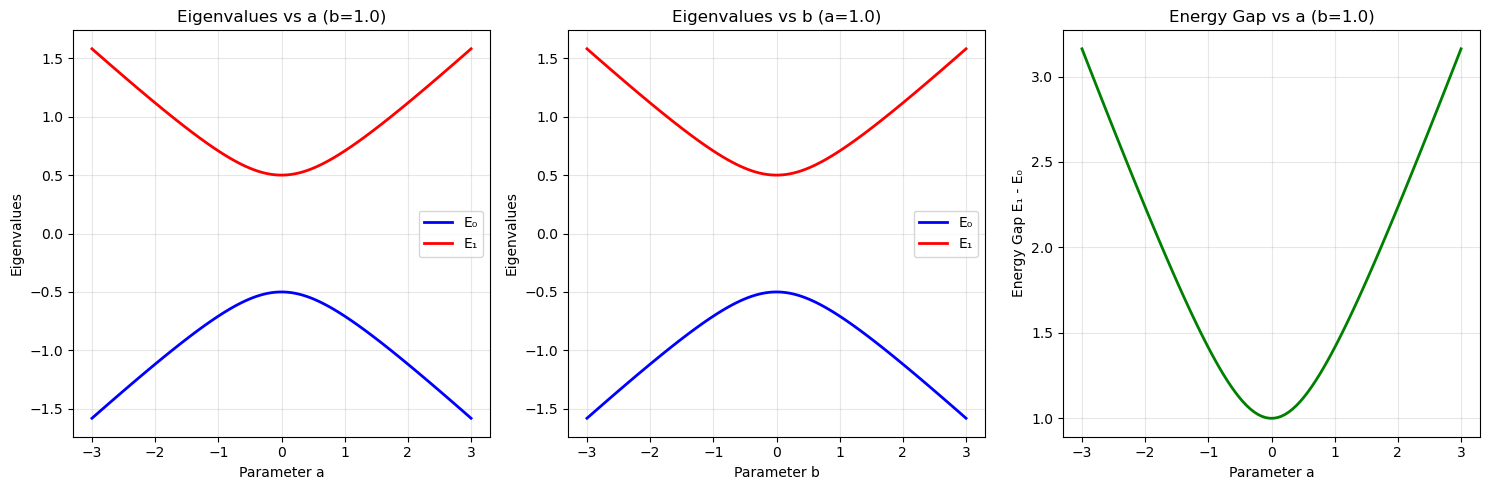

In [11]:
plot_eigenvalues_vs_parameters()

In [27]:
def plot_bloch_sphere_evolution_chiral():
    """Plot eigenvectors on Bloch sphere with chiral basis labels"""
    fig = plt.figure(figsize=(15, 10))
    
    # Parameter sets to visualize
    parameter_sets = [
        (2.0, 0.1),   # Large a, small b (near chiral eigenstates)
        (0.1, 2.0),   # Small a, large b (near superposition states)  
        (1.0, 1.0),   # Equal mixing
        (0.5, 1.5),   # Intermediate
    ]
    
    for i, (a, b_val) in enumerate(parameter_sets):
        evals, evecs = analyze_hamiltonian(a, b_val)
        
        # Create Bloch sphere with chiral labels
        ax = fig.add_subplot(2, 2, i+1, projection='3d')
        bloch_sphere = qt.Bloch(fig=fig, axes=ax)
        bloch_sphere.frame_width = 1.5
        bloch_sphere.font_size = 10
        
        # Set chiral basis labels
        bloch_sphere.xlabel = ['L', 'R']  # Left-handed, Right-handed
        bloch_sphere.ylabel = ['-i|R⟩ + i|L⟩', 'i|R⟩ - i|L⟩']
        bloch_sphere.zlabel = ['L', 'R']  # |L⟩ at north, |R⟩ at south
        
        # Add eigenvectors to Bloch sphere
        for j, evec in enumerate(evecs):
            # Calculate expectation values for Bloch vector
            x = qt.expect(sigma_x, evec)
            y = qt.expect(sigma_y, evec)
            z = qt.expect(sigma_z, evec)
            
            # Add point with color based on energy
            color = 'red' if j == 0 else 'blue'
            bloch_sphere.add_points([x, y, z])
            bloch_sphere.add_vectors([x, y, z])
        
        bloch_sphere.render()
        ax.set_title(f'a={a}, b={b_val}\nE₀={evals[0]:.2f}, E₁={evals[1]:.2f}\nChiral Basis')
    
    plt.tight_layout()
    plt.show()

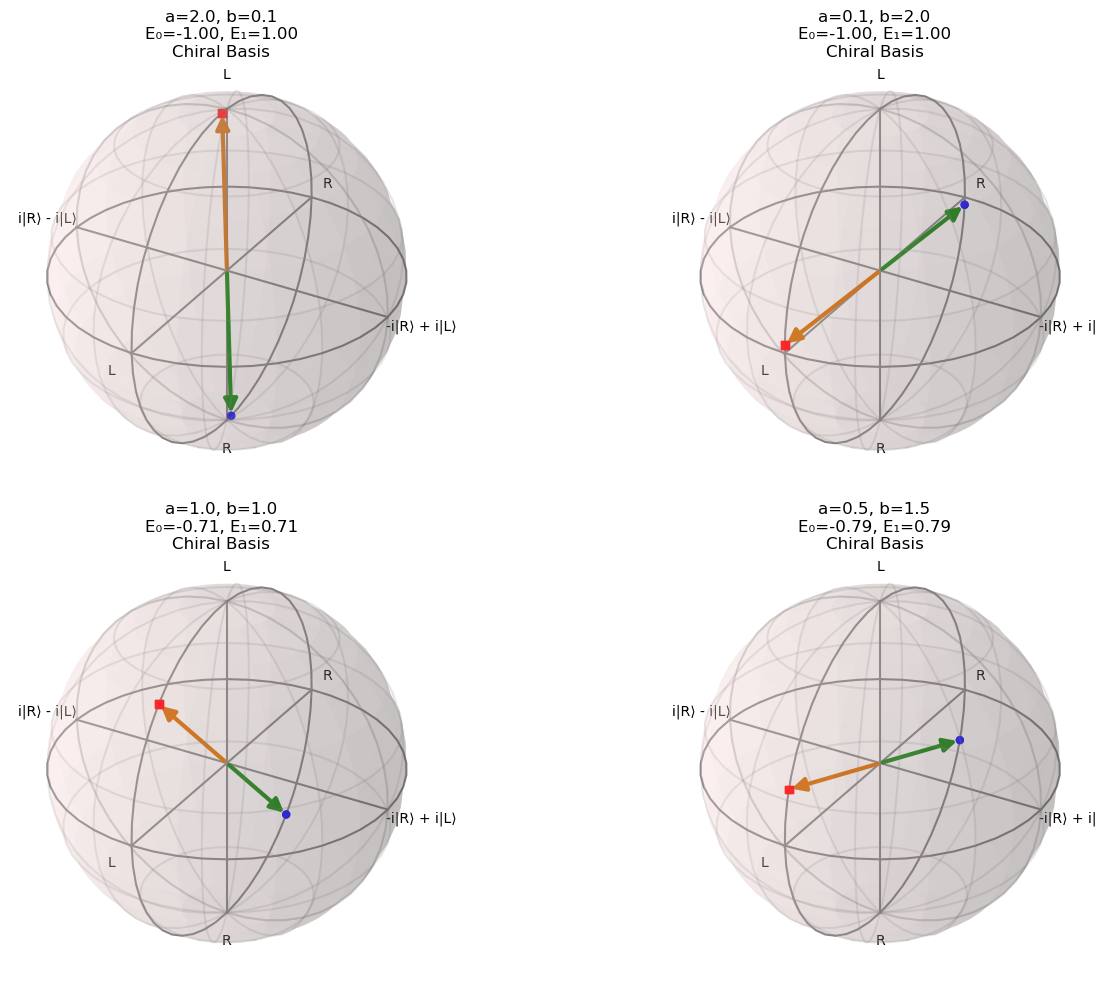

In [28]:
plot_bloch_sphere_evolution_chiral()

In [31]:
def plot_eigenvalues_vs_parameters_chiral():
    """Plot eigenvalues with chiral basis interpretation"""
    fig = plt.figure(figsize=(15, 5))
    
    # Plot 1: Eigenvalues vs a (fixed b) - showing chiral symmetry breaking
    ax1 = fig.add_subplot(131)
    a_values = np.linspace(-3, 3, 100)
    b_fixed = 1.0
    
    eigenvals_plus = []
    eigenvals_minus = []
    chiral_purity = []  # Measure of how chiral the states are
    
    for a in a_values:
        evals, evecs = analyze_hamiltonian(a, b_fixed)
        eigenvals_plus.append(evals[0])
        eigenvals_minus.append(evals[1])
        
        # Calculate chiral purity: |⟨L|ψ⟩|² - |⟨R|ψ⟩|² for ground state
        ground_state = evecs[0]
        prob_L = abs(ground_state.full()[0, 0])**2  # |0⟩ is |L⟩
        prob_R = abs(ground_state.full()[1, 0])**2  # |1⟩ is |R⟩
        chiral_purity.append(prob_L - prob_R)
    
    ax1.plot(a_values, eigenvals_plus, 'b-', label='E₀ (Ground)', linewidth=2)
    ax1.plot(a_values, eigenvals_minus, 'r-', label='E₁ (Excited)', linewidth=2)
    ax1.set_xlabel('Parameter a (Chiral Symmetry Breaking)')
    ax1.set_ylabel('Energy')
    ax1.set_title(f'Energy vs Chiral Symmetry Breaking (b={b_fixed})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Chiral purity of ground state
    ax2 = fig.add_subplot(132)
    ax2.plot(a_values, chiral_purity, 'purple', linewidth=2)
    ax2.set_xlabel('Parameter a')
    ax2.set_ylabel('Chiral Purity: P(L) - P(R)')
    ax2.set_title('Ground State Chiral Purity')
    ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Tunneling rate vs parameters
    ax3 = fig.add_subplot(133)
    b_values = np.linspace(0.1, 3, 100)
    tunneling_rates = []
    
    for b in b_values:
        evals, evecs = analyze_hamiltonian(0, b)  # At symmetric point a=0
        tunneling_rates.append(evals[1] - evals[0])  # Energy gap = tunneling rate
    
    ax3.plot(b_values, tunneling_rates, 'green', linewidth=2)
    ax3.set_xlabel('Parameter b (Tunneling Strength)')
    ax3.set_ylabel('Tunneling Rate (Energy Gap)')
    ax3.set_title('Tunneling Between Chiral States\n(a=0, symmetric case)')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

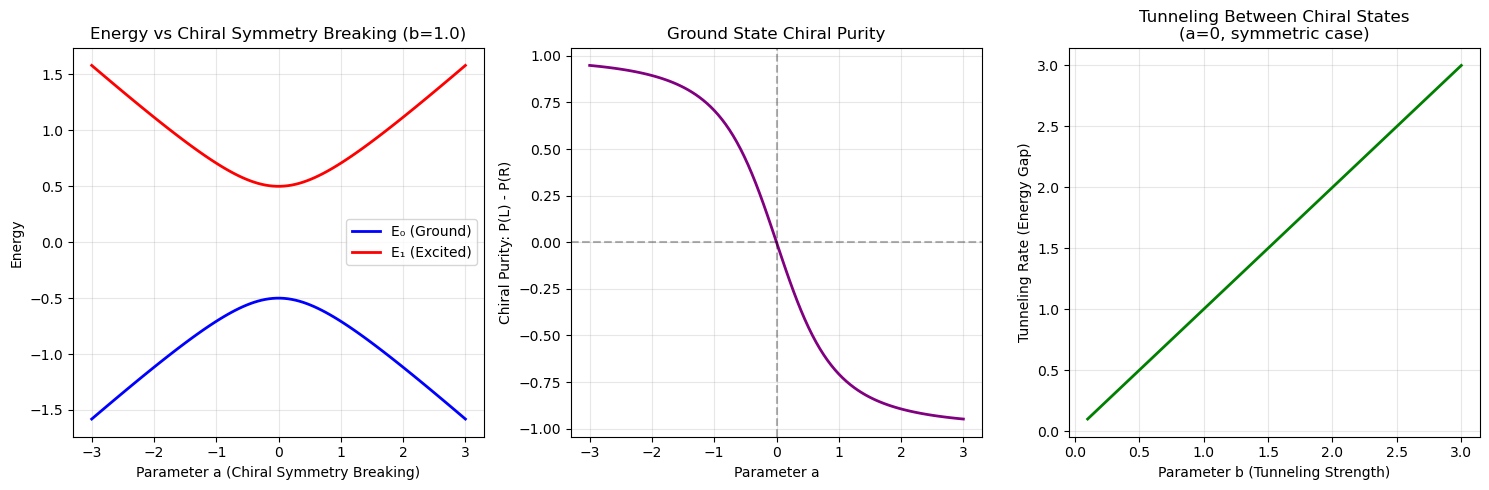

In [32]:
plot_eigenvalues_vs_parameters_chiral()

In [33]:
def plot_chiral_dynamics():
    """Plot the dynamics of chiral state populations"""
    fig = plt.figure(figsize=(12, 4))
    
    # Parameter sets to show different regimes
    regimes = [
        (2.0, 0.1, "Broken Symmetry (a >> b)"),
        (0.1, 2.0, "Tunneling Dominant (b >> a)"),
        (0.0, 1.0, "Symmetric (a = 0)"),
    ]
    
    for i, (a, b, title) in enumerate(regimes):
        ax = fig.add_subplot(1, 3, i+1)
        
        # Time evolution
        H = 0.5 * a * sigma_z + 0.5 * b * sigma_x
        times = np.linspace(0, 10, 200)
        
        # Start in pure left-handed state |L⟩ = |0⟩
        psi0 = qt.basis(2, 0)  # |L⟩
        
        # Solve Schrödinger equation
        result = qt.mesolve(H, psi0, times, [], [])
        
        # Calculate populations
        pop_L = np.zeros(len(times))  # Population in |L⟩
        pop_R = np.zeros(len(times))  # Population in |R⟩
        
        for j, state in enumerate(result.states):
            pop_L[j] = abs(state.full()[0, 0])**2
            pop_R[j] = abs(state.full()[1, 0])**2
        
        ax.plot(times, pop_L, 'blue', label='P(L)', linewidth=2)
        ax.plot(times, pop_R, 'red', label='P(R)', linewidth=2)
        ax.set_xlabel('Time')
        ax.set_ylabel('Population')
        ax.set_title(f'{title}\na={a}, b={b}')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

/Users/tchatterjee/anaconda3/envs/pmp/lib/python3.13/site-packages/qutip/solver/solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


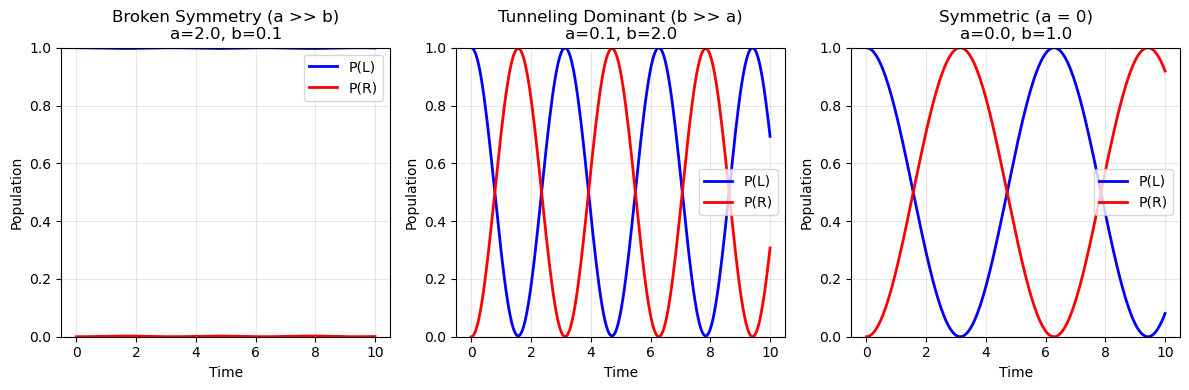

In [34]:
plot_chiral_dynamics()

In [35]:
def plot_chiral_phase_diagram():
    """Create a phase diagram showing chiral behavior"""
    plt.figure(figsize=(10, 8))
    
    a_range = np.linspace(-2, 2, 50)
    b_range = np.linspace(0.1, 2, 50)
    
    # Calculate chiral order parameter
    chiral_order = np.zeros((len(b_range), len(a_range)))
    
    for i, b in enumerate(b_range):
        for j, a in enumerate(a_range):
            evals, evecs = analyze_hamiltonian(a, b)
            ground_state = evecs[0]
            # Chiral order parameter: ⟨σ_z⟩
            chiral_order[i, j] = qt.expect(sigma_z, ground_state)
    
    plt.imshow(chiral_order, extent=[-2, 2, 0.1, 2], origin='lower', 
               aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1)
    plt.colorbar(label='Chiral Order Parameter ⟨σ_z⟩')
    plt.xlabel('Parameter a (Chiral Symmetry Breaking)')
    plt.ylabel('Parameter b (Tunneling Strength)')
    plt.title('Chiral Phase Diagram\n⟨σ_z⟩ = P(L) - P(R)')
    
    # Add contour lines
    contours = plt.contour(a_range, b_range, chiral_order, 
                          levels=[-0.9, -0.5, 0, 0.5, 0.9], colors='black', alpha=0.5)
    plt.clabel(contours, inline=True, fontsize=8)
    
    # Label different regions
    plt.text(-1.5, 0.3, 'L-handed\nDominant', ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
    plt.text(1.5, 0.3, 'R-handed\nDominant', ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
    plt.text(0, 1.5, 'Tunneling\nRegion', ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
    
    plt.grid(True, alpha=0.3)
    plt.show()

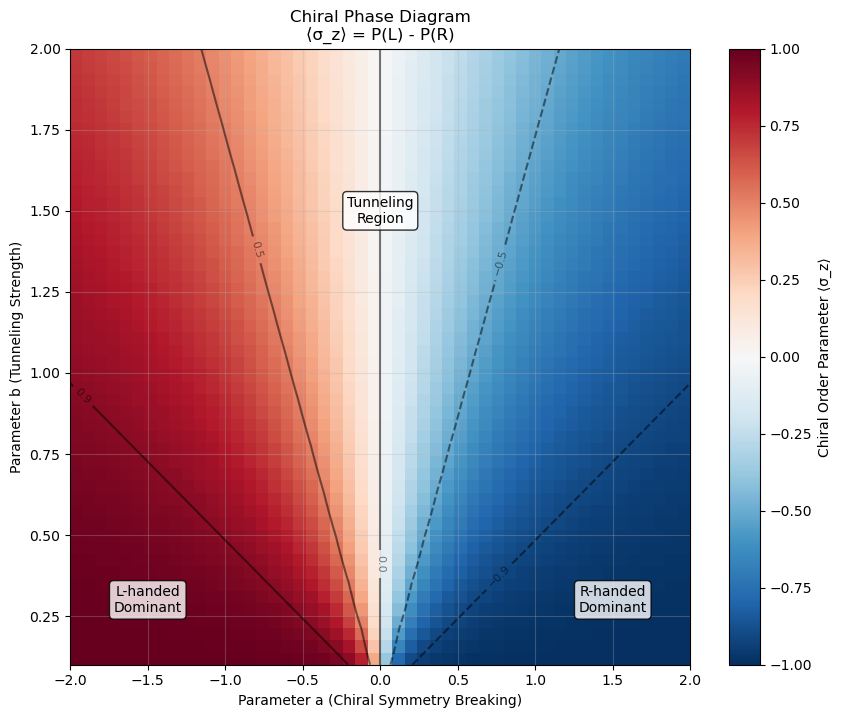

In [36]:
plot_chiral_phase_diagram()

In [37]:
cases = [
    ("Broken Symmetry L (a=2, b=0.1)", 2, 0.1),
    ("Broken Symmetry R (a=-2, b=0.1)", -2, 0.1),
    ("Symmetric Tunneling (a=0, b=1)", 0, 1),
    ("Mixed Case (a=1, b=1)", 1, 1),
]

for desc, a, b in cases:
    evals, evecs = analyze_hamiltonian(a, b)
    ground_state = evecs[0]
    
    # Calculate chiral populations
    prob_L = abs(ground_state.full()[0, 0])**2
    prob_R = abs(ground_state.full()[1, 0])**2
    chiral_order = prob_L - prob_R
    
    print(f"\n{desc}:")
    print(f"  Energies: E₀ = {evals[0]:.3f}, E₁ = {evals[1]:.3f}")
    print(f"  Energy gap (tunneling): {evals[1]-evals[0]:.3f}")
    print(f"  Ground state chiral populations:")
    print(f"    P(L) = {prob_L:.3f}, P(R) = {prob_R:.3f}")
    print(f"  Chiral order parameter: {chiral_order:.3f}")
    
    if abs(chiral_order) > 0.8:
        state = "L-handed" if chiral_order > 0 else "R-handed"
        print(f"  → Strongly {state} chiral state")
    elif abs(chiral_order) < 0.2:
        print(f"  → Nearly symmetric superposition")
    else:
        print(f"  → Mixed chiral character")


Broken Symmetry L (a=2, b=0.1):
  Energies: E₀ = -1.001, E₁ = 1.001
  Energy gap (tunneling): 2.002
  Ground state chiral populations:
    P(L) = 0.001, P(R) = 0.999
  Chiral order parameter: -0.999
  → Strongly R-handed chiral state

Broken Symmetry R (a=-2, b=0.1):
  Energies: E₀ = -1.001, E₁ = 1.001
  Energy gap (tunneling): 2.002
  Ground state chiral populations:
    P(L) = 0.999, P(R) = 0.001
  Chiral order parameter: 0.999
  → Strongly L-handed chiral state

Symmetric Tunneling (a=0, b=1):
  Energies: E₀ = -0.500, E₁ = 0.500
  Energy gap (tunneling): 1.000
  Ground state chiral populations:
    P(L) = 0.500, P(R) = 0.500
  Chiral order parameter: 0.000
  → Nearly symmetric superposition

Mixed Case (a=1, b=1):
  Energies: E₀ = -0.707, E₁ = 0.707
  Energy gap (tunneling): 1.414
  Ground state chiral populations:
    P(L) = 0.146, P(R) = 0.854
  Chiral order parameter: -0.707
  → Mixed chiral character
